# Assignment 1 - Outlier Detection

*Due: Wednesday, 27 November, 2024 at 17:00 CET*

For the first assignment of the course Applications of Machine Learning (INFOB3APML), you will learn to use decision tree, random forest, and isolation forest to detect an outlier class. The objectives of this assignment are:
- use the supervised classification algorithms to classify outliers in real-life data sets
- perform cross validation and fine-tune the model parameters of each algorithm
- use the unsupervised outlier detection algorithms to detect outliers in real-life data sets
- calculate model performance (e.g., accuracy, recall, precision, f1)
- design experiments to compare performance of algorithms
- reflect on the difference between different models


This assignment includes three algorithms: DT, RF, and IF. The first task is to perform data exploration. In Task 2-4, you will use the three algorithms to classify outliers, respectively. In Task 5, you will compare the algorithms and evaluate their results. Please note that Task 2-4 have the following structure:
1. First, find the library (e.g., sklearn examples) and try out the algorithm by simply training the model on the training data (do not consider any parameters or cross validation just yet); 
2. Train the model with the training data by using cross validation and find the best parameter setting for the parameters of interest;
3. Report the average validation accuracy, recall, precision, and F1 scores of all validation sets;
4. Finally, test the optimal model that has the best fitting parameters on your (held-out) test data, and report the test accuracy, precision, recall, and F1. 

Note that, in Task 5, you will need all the calculated accuracy, precision, recall and F1 measures from previous tasks. Make sure you save these to a list or dictionary so you can easily evaluate and compare the results. 




## Task 1: Exploring the data set
 
 

### Data set: Bank Marketing


Import the file *dataBank-additional-full_normalised.csv* to load the preprocessed data set. "*The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.*"


Use the column "label" as the response variable:
- The instances labeled with 1 are the "outliers", in this case the class we would like to detect accurately; 
- The instance labeled with 0 are the "inliers".


The original data description can be found via the link here below. You will also find some explanations regarding the features under the section "Attribute Information".  
https://archive.ics.uci.edu/ml/datasets/bank+marketing





In [ ]:
# import packages
import pandas as pd
import numpy as np

# import data
data = pd.read_csv('./dataBank-additional-full_normalised_sampled.csv', sep=',')

print(data.columns)

# check unique values in the 'loan' column
unique_loan_values = data['loan=0'].unique()

# print the unique values
print("Unique values in the 'loan' column:")
print(unique_loan_values)

Index(['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'p


### 1.1. Exploratory data analysis

For the data set, create 2-3 figures and tables that will help you understand the data. 


During the data exploration, you, as a team, are trying to get an impression about the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many instances are there in each class? Are the classes imbalanced?
- How many variables are in the data? What is the data type and the distribution of each variable? 
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)

#### Tips: 

Make sure to at least check the data type of each variable and to understand the distribution of each variable, especially the response variable. 

Try to find out what factors seem to determine whether an instance is an outlier or not. What do you conclude?

*For creating data visualizations, you may consider using the matplot library and visit the [matplot gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration (e.g., histograms for distribution, or heatmaps for feature correlation).*



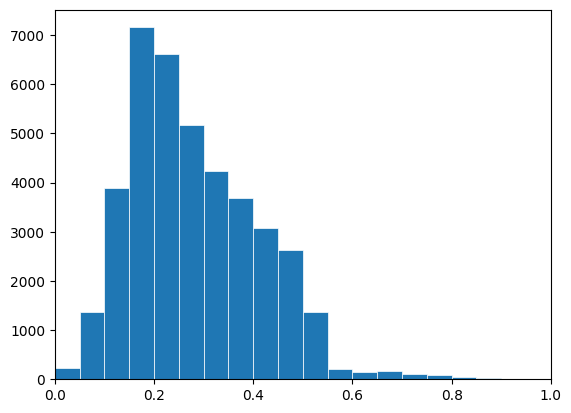

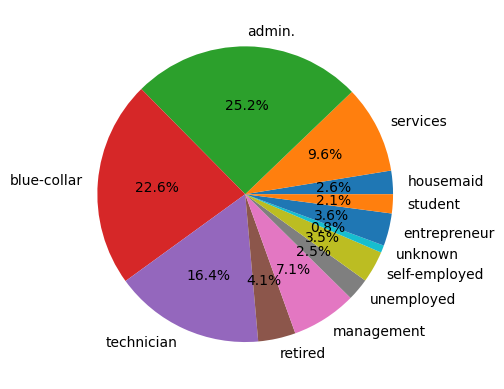

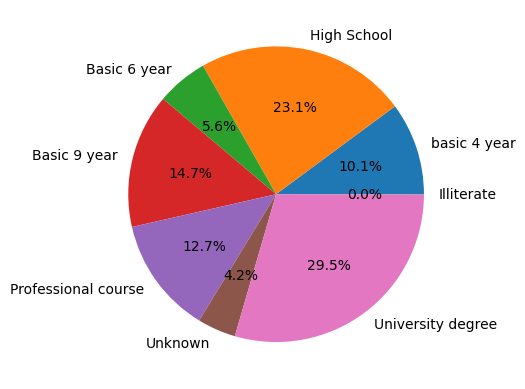

In [ ]:
# import packages
import matplotlib.pyplot as plt

# TODO: plot figure(s)
# age histogram
fig, ax = plt.subplots()

ax.hist(data["age"], bins=20, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 1),
       ylim=(0))
plt.show()

# piechart showing different jobs
jobs_to_sum = ['job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar', 'job=technician', 'job=retired', 
                  'job=management', 'job=unemployed', 'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student'] 
job_sums = data[jobs_to_sum].sum()

job_labels = ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed',
'self-employed', 'unknown', 'entrepreneur', 'student']

fig, ax = plt.subplots()
ax.pie(job_sums, labels=job_labels, autopct='%1.1f%%')
plt.show()

# piechart showing education levels
education_to_sum = ['education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate'] 
education_sums = data[education_to_sum].sum()

education_labels = ['basic 4 year', 'High School', 'Basic 6 year', 'Basic 9 year',
                    'Professional course', 'Unknown', 'University degree', 'Illiterate' ]

fig, ax = plt.subplots()
ax.pie(education_sums, labels=education_labels, autopct='%1.1f%%')
plt.show()

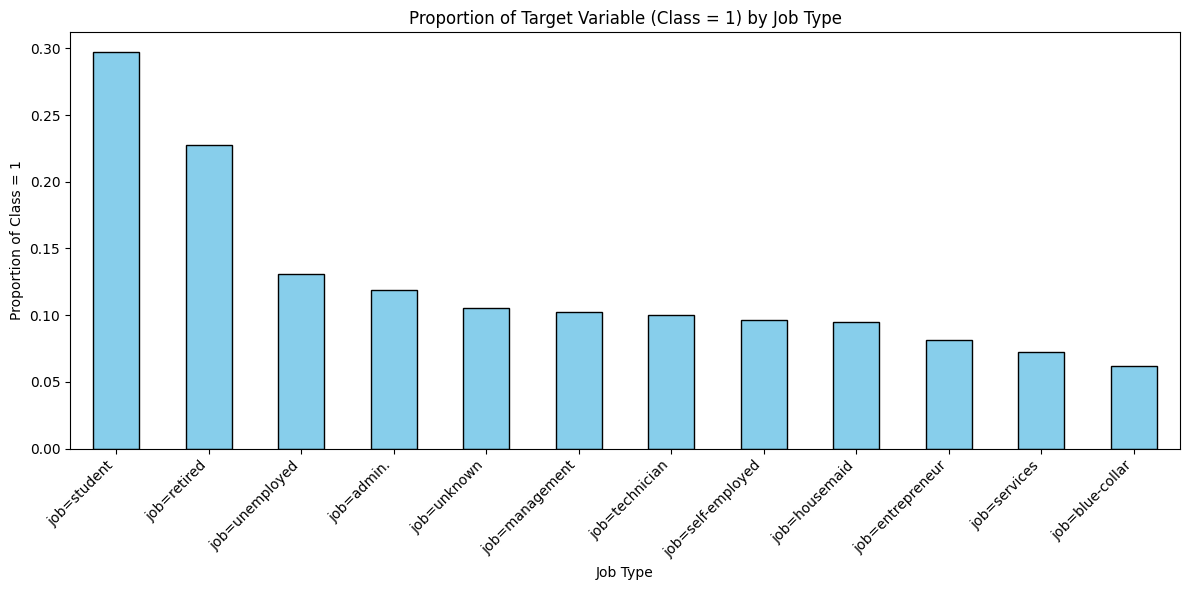

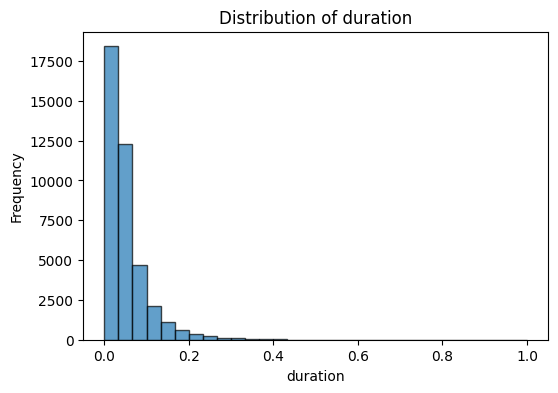

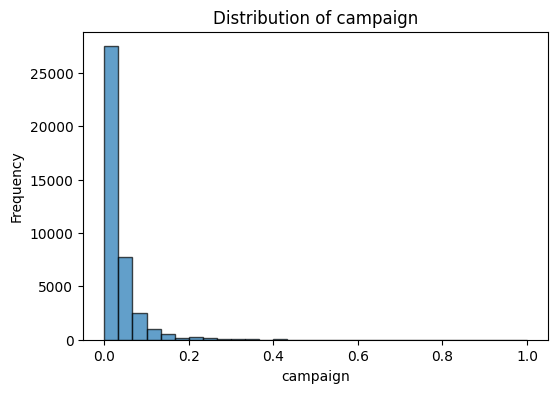

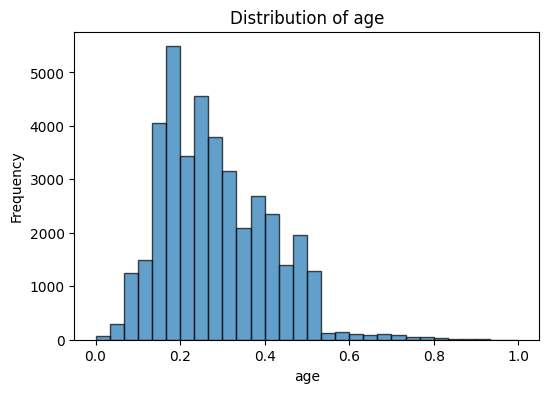

In [ ]:
# filter job-related columns and target variable
job_columns = [col for col in data.columns if col.startswith('job=')]
job_data = data[job_columns + ['class']]

# calculate the proportion of target = 1 for each job
job_proportions = job_data[job_columns].mul(job_data['class'], axis=0).sum() / job_data[job_columns].sum()

# plot the proportions
job_proportions.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='k')
plt.title('Proportion of Target Variable (Class = 1) by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Proportion of Class = 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

features = ['duration', 'campaign', 'age']
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.hist(data[feature], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

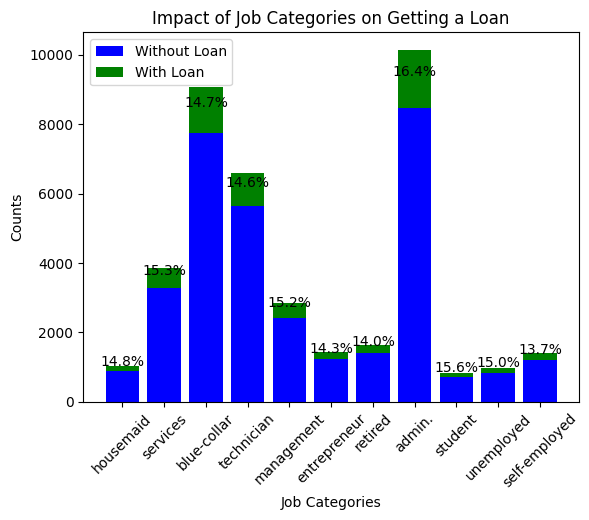

In [4]:
# list of job categories
jobs = ['housemaid', 'services', 'blue-collar', 'technician', 'management', 'entrepreneur', 'retired', 'admin.', 'student', 'unemployed', 'self-employed']

# initialize dictionaries to store counts
counts_with_loan = {}
counts_without_loan = {}

# iterate through the job categories and calculate counts
for job in jobs:
    with_loan = data.loc[(data[f'job={job}'] == 1) & (data['loan=1'] == 1)]
    without_loan = data.loc[(data[f'job={job}'] == 1) & (data['loan=1'] == 0)]
    
    counts_with_loan[job] = len(with_loan.index)
    counts_without_loan[job] = len(without_loan.index)

# calculate percentages
percentages_with_loan = {job: (counts_with_loan[job] / (counts_with_loan[job] + counts_without_loan[job]) * 100) for job in jobs}

# data for plotting
job_categories = list(counts_with_loan.keys())
with_loan_counts = list(counts_with_loan.values())
without_loan_counts = list(counts_without_loan.values())

# create the stacked bar chart
x = range(len(job_categories))
bars1 = plt.bar(x, without_loan_counts, label='Without Loan', color='blue')
bars2 = plt.bar(x, with_loan_counts, bottom=without_loan_counts, label='With Loan', color='green')

# add percentage labels to the green part of the bars
for i, job in enumerate(job_categories):
    plt.text(x=i, y=without_loan_counts[i] + with_loan_counts[i] / 2, s=f"{percentages_with_loan[job]:.1f}%", ha='center', va='bottom', color='black')

# customize the plot
plt.xlabel('Job Categories')
plt.ylabel('Counts')
plt.title('Impact of Job Categories on Getting a Loan')
plt.xticks(x, job_categories, rotation=45)
plt.legend()

# show the plot
plt.show()

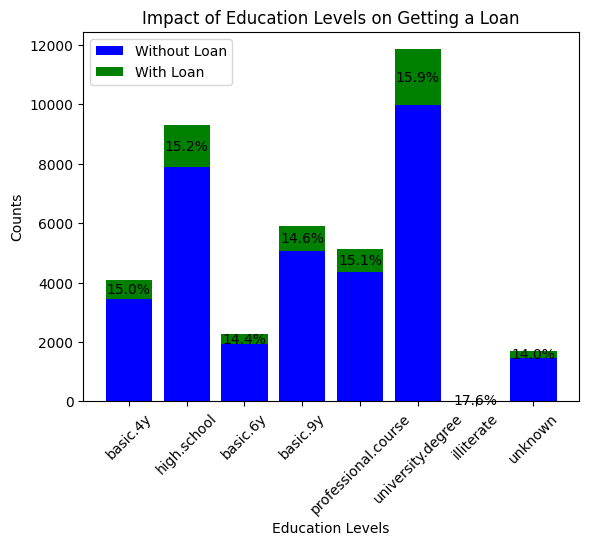

In [5]:
# list of education levels
education_levels = ['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
                    'professional.course', 'university.degree', 'illiterate', 'unknown']

# initialize dictionaries to store counts
counts_with_loan = {}
counts_without_loan = {}

# iterate through the education levels and calculate counts
for level in education_levels:
    with_loan = data.loc[(data[f'education={level}'] == 1) & (data['loan=1'] == 1)]
    without_loan = data.loc[(data[f'education={level}'] == 1) & (data['loan=1'] == 0)]
    
    counts_with_loan[level] = len(with_loan.index)
    counts_without_loan[level] = len(without_loan.index)

# calculate percentages
percentages_with_loan = {level: (counts_with_loan[level] / (counts_with_loan[level] + counts_without_loan[level]) * 100) for level in education_levels}

# data for plotting
education_categories = list(counts_with_loan.keys())
with_loan_counts = list(counts_with_loan.values())
without_loan_counts = list(counts_without_loan.values())

# create the stacked bar chart
x = range(len(education_categories))
bars1 = plt.bar(x, without_loan_counts, label='Without Loan', color='blue')
bars2 = plt.bar(x, with_loan_counts, bottom=without_loan_counts, label='With Loan', color='green')

# add percentage labels to the green part of the bars
for i, level in enumerate(education_categories):
    percentage = percentages_with_loan[level]
    total = with_loan_counts[i] + without_loan_counts[i]
    plt.text(x=i, y=without_loan_counts[i] + with_loan_counts[i] / 2, s=f"{percentage:.1f}%", ha='center', va='center', color='black')

# customize the plot
plt.xlabel('Education Levels')
plt.ylabel('Counts')
plt.title('Impact of Education Levels on Getting a Loan')
plt.xticks(x, education_categories, rotation=45)
plt.legend()

# show the plot
plt.show()

### 1.2. Creating Train and Test data sets

Create a training and a held-out test data set. *Later in Task 2-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data and motivate your choice when you discuss the experiment setup in your report. 

Tips: 

*You may use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) class provided by sklearn*

In [ ]:
# import method to make a train/test split
from sklearn.model_selection import train_test_split

# copy data
df = data.copy()

# create X and y
features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome=nonexistent', 'poutcome=failure',
       'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']
X = df[features]
y = df[['class']]

# TODO: create training data and held-out test data
# 80/20 split
X_train, X_heldout, y_train, y_heldout = train_test_split(X,y,test_size=0.2,random_state=42)

## Task 2: Decision Trees 
### - Outlier Detection as a Supervised Classification

### 2.1 Training a Decision Tree

Use the basic [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) library in sklearn to learn a decision tree model by fitting the full training data.

Show/plot the tree diagram and also plot the feature importances. 
What do you observe?


#### Tips:

To show the tree diagram, you may use the graphviz library or use the plot_tree function, see https://scikit-learn.org/stable/modules/tree.html




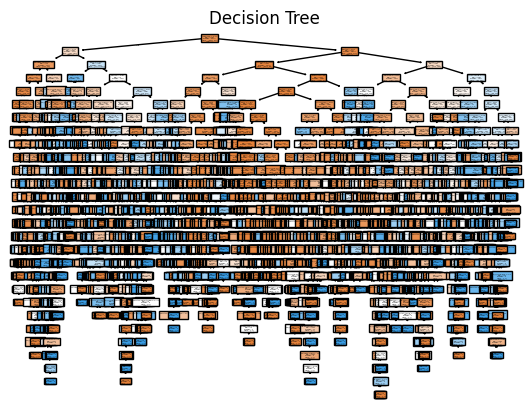

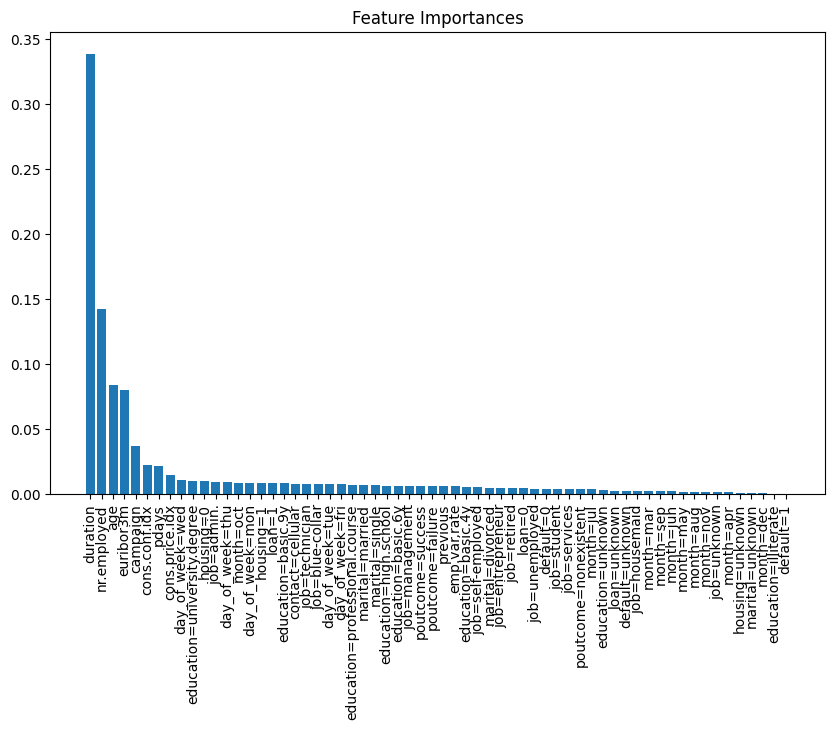

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# TODO: learn a decision tree using default parameters
cl = DecisionTreeClassifier(random_state=42)
cl.fit(X_train,y_train)

# TODO: plot the tree
plot_tree(
    cl, 
    #feature_names specifies the names of the input features (columns of X_train).
    feature_names=X_train.columns, 
    #class_names specifies the names of the target classes, had to convert them to strings
    class_names=[str(label) for label in cl.classes_],
    filled=True
)
plt.title("Decision Tree")
plt.show()

# TODO: plot the feature importances
# get the importance of each feature in the decision tree.
sorted_indices = np.argsort(cl.feature_importances_)[::-1]
# create a bar chart of feature importances
plt.figure(figsize=(10,6))
plt.bar(range(len(cl.feature_importances_)),cl.feature_importances_[sorted_indices], align="center")
# set x-axis labels to the feature names, sorted by importance
plt.xticks(range(len(cl.feature_importances_)),X_train.columns[sorted_indices],rotation=90)
plt.title("Feature Importances")
plt.show()

### 2.2 Confusion Matrix and Accuracy

Compute the *confusion matrix* and *accuracy* of the tree using the held-out data set. Moreover, also compute the *recall*, *precision*, and *F1-score* of the tree. 


For this part, you can either implement your own functions or use the following scikit-learn libraries.  
- [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
- [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
- [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
- [f1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)


Reflect on the performance of the model and be aware of the difference between *accuracy* and *F1-score*. How good is this decision tree model for outlier detection?

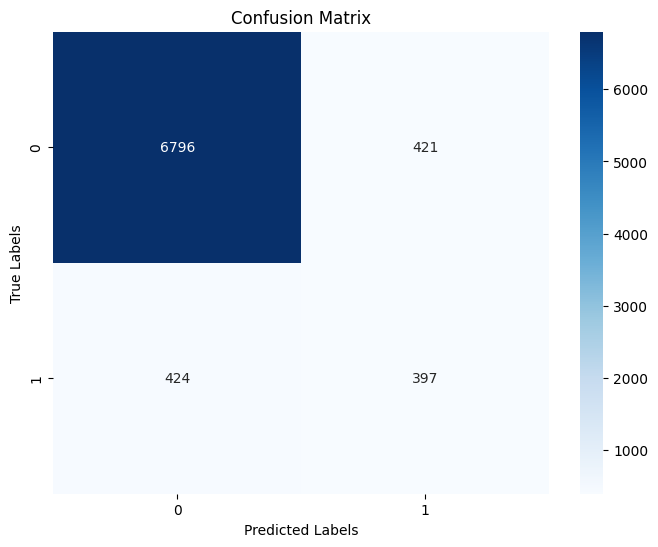

Accuracy score: 0.8948743468524508

Recall score: 0.4835566382460414

Precision score: 0.48533007334963324

F1 score: 0.4844417327638804

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7217
           1       0.49      0.48      0.48       821

    accuracy                           0.89      8038
   macro avg       0.71      0.71      0.71      8038
weighted avg       0.89      0.89      0.89      8038



In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

# use the model to make predictions for the test data set
y_pred = cl.predict(X_heldout)

# TODO: compute accuracy, recall, precision, and f1 score
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_heldout, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=cl.classes_, yticklabels=cl.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy score:",accuracy_score(y_heldout,y_pred))
print("\nRecall score:",recall_score(y_heldout,y_pred))
print("\nPrecision score:",precision_score(y_heldout,y_pred))
print("\nF1 score:",f1_score(y_heldout,y_pred))
print("\nClassification Report:\n", classification_report(y_heldout, y_pred))

### 2.3 Features to Tree  (optional)

Use the training data to re-fit a new decision tree with the parameter max_depth set to 4. Show the tree diagram and also plot the feature importances. 

Recalculate the performance of this simpler model. 

What do you observe?


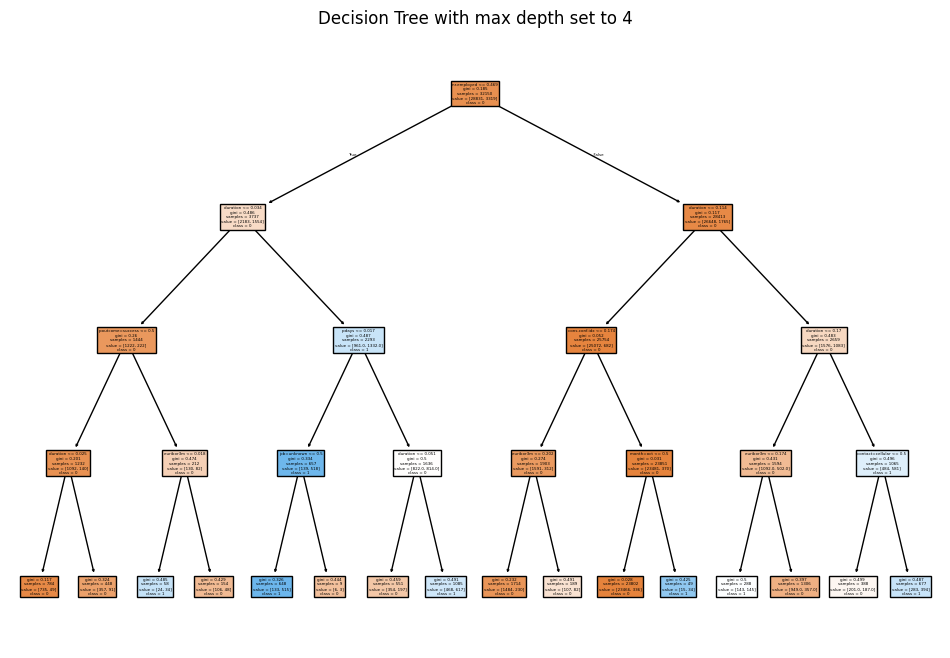

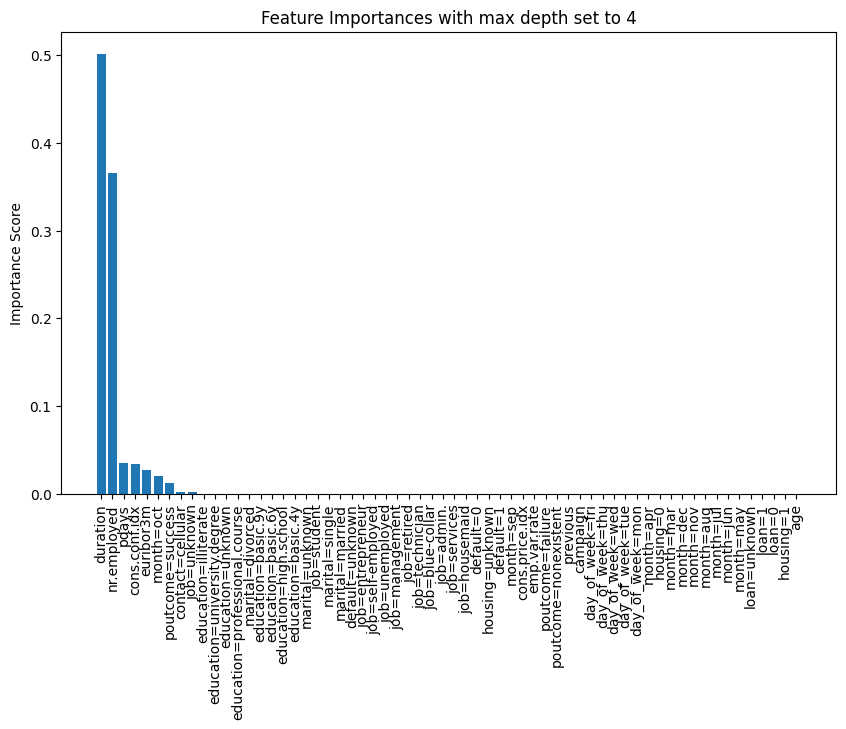

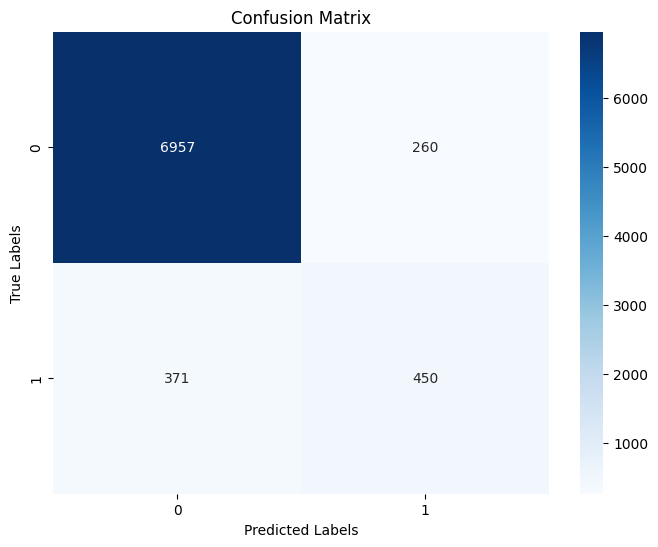

Accuracy score: 0.9214978850460314

Recall score: 0.5481120584652862

Precision score: 0.6338028169014085

F1 score: 0.5878510777269759

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      7217
           1       0.63      0.55      0.59       821

    accuracy                           0.92      8038
   macro avg       0.79      0.76      0.77      8038
weighted avg       0.92      0.92      0.92      8038



In [9]:
# TODO: learn a decision tree with maximal depth 4
cl_depth = DecisionTreeClassifier(max_depth = 4, random_state = 42)
cl_depth.fit(X_train, y_train)

# TODO: plot the tree
plt.figure(figsize=(12, 8))
plot_tree(
    cl_depth,
    feature_names=X_train.columns,
    class_names=[str(label) for label in cl_depth.classes_],
    filled=True
)
plt.title("Decision Tree with max depth set to 4")
plt.show()

# use the model to make predictions for the test data set
importances = cl_depth.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# plot for feature importances
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), X_train.columns[sorted_indices], rotation=90)
plt.title("Feature Importances with max depth set to 4")
plt.ylabel("Importance Score")
plt.show()

# TODO: compute accuracy, recall, precision, and f1 score
y_pred_depth = cl_depth.predict(X_heldout)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_heldout, y_pred_depth), annot=True, fmt='d', cmap='Blues', xticklabels=cl_depth.classes_, yticklabels=cl_depth.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy score:",accuracy_score(y_heldout, y_pred_depth))
print("\nRecall score:",recall_score(y_heldout, y_pred_depth))
print("\nPrecision score:",precision_score(y_heldout, y_pred_depth))
print("\nF1 score:",f1_score(y_heldout, y_pred_depth))
print("\nClassification Report:\n", classification_report(y_heldout, y_pred_depth))

### 2.4 Cross validation (optional)

The code example shown here below uses the [kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) method to implement 5-fold cross-validation. Moreover, it uses the cross validation to explore how the max_depth influences the model performance. It keeps track of the validation accuracy scores and F1-scores across the 5 folds. 


Now, change the code to also compute the recall and precision. 


In [ ]:
from sklearn.model_selection import KFold

# create 5-fold cross-validation
nk = 5
kf = KFold(n_splits=nk, random_state=42, shuffle=True)

# Search the parameter among the following
C = np.arange(2, 10,)

# init acc
acc = np.zeros((nk , len(C)))
# init f1
f1 = np.zeros((nk , len(C)))
# init recall
recall = np.zeros((nk, len(C)))
# init precision
precision = np.zeros((nk, len(C)))

i = 0
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = c)
        dt.fit(X_t, y_t)
        yhat = dt.predict(X_val)
        acc[i][j] = accuracy_score(yhat , y_val)
        f1[i][j] = f1_score(yhat , y_val)
        recall[i][j] = recall_score(y_val, yhat)
        precision[i][j] = precision_score(y_val, yhat)
        j = j + 1
    i = i + 1
    
print('Mean accuracy: ' + str(np.mean(acc , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc , axis = 0))))

print('Mean F1: ' + str(np.mean(f1 , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(f1 , axis = 0))))

print('Mean Recall: ' + str(np.mean(recall, axis=0)))
print('Selected model index: ' + str(np.argmax(np.mean(recall, axis=0))))

print('Mean Precision: ' + str(np.mean(precision, axis=0)))
print('Selected model index: ' + str(np.argmax(np.mean(precision, axis=0))))

Mean accuracy: [0.90783826 0.9103577  0.91589425 0.91825816 0.91785381 0.91545879
 0.9125972  0.91318818]
Selected model index: 3
Mean F1: [0.47158601 0.45763406 0.5451898  0.5271481  0.5609278  0.55543531
 0.53312538 0.54690221]
Selected model index: 4
Mean Recall: [0.39897929 0.37470417 0.48889838 0.44164669 0.50993265 0.51361225
 0.48395895 0.50803549]
Selected model index: 5
Mean Precision: [0.57707323 0.61312123 0.61751263 0.65452836 0.62659703 0.60731691
 0.59416211 0.5932386 ]
Selected model index: 3


### 2.5 Tree Tuning



The built-in decision tree algorithm you are using has several parameters which you can tune (e.g., *max_depth* and *min_samples_leaf*). Use 5-fold cross-validation (e.g., reuse the code of task 2.4 and adapt the code for two parameters), show how the choice of these parameters affects performance. 


#### Tips: 
Make a decision on the range of values that you would try for the two parameters and discuss your choice in the experiment setup section.

Here is a guide that helps you to build the experiment.
First, reuse the code of task 2.4 and show how max_depth affects train and **validation accuracy**. On a single axis, plot train and **validation accuracy** as a function of max_depth. Use a red line to show validation accuracy and a blue line to show train accuracy. (Do not use your (held-out) **test data** yet). 

Second, show how validation accuracy relates to both max_depth and min_samples_leaf. Specifically, create a 3-D plot where the x-axis is max_depth, the y-axis is min_samples_leaf, and the z-axis shows accuracy. What combination of max_depth and min-samples_leaf achieves the highest F1 score? How sensitive are the results to these two parameters? 

Finally, select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data -- how does it compare to the cross-validated F1 score?


instance: 9, leaf: 3, depth: 4
instance: 27, leaf: 6, depth: 4
instance: 70, leaf: 13, depth: 5
instance: 106, leaf: 19, depth: 5


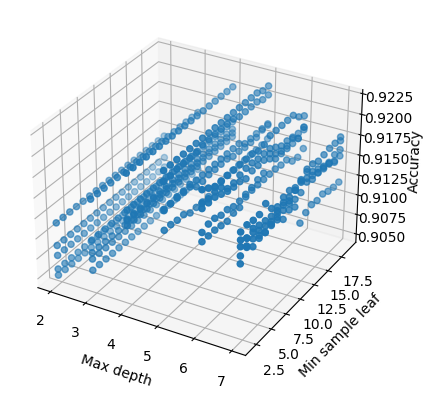

   Model Index  Mean Accuracy  Mean F1 Score  Mean Recall  Mean Precision
0            0       0.914852       0.507065     0.446647        0.595026
1            1       0.912337       0.513050     0.433275        0.637284
2            2       0.914390       0.523428     0.456343        0.622519
3            3       0.917034       0.513452     0.444112        0.618061
4            4       0.912494       0.542694     0.496526        0.603622
Accuracy score: 0.9214978850460314

Recall score: 0.5481120584652862

Precision score: 0.6338028169014085

F1 score: 0.5878510777269759

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      7217
           1       0.63      0.55      0.59       821

    accuracy                           0.92      8038
   macro avg       0.79      0.76      0.77      8038
weighted avg       0.92      0.92      0.92      8038

Accuracy score: 0.9176982892690513

Recall score: 0.523952997890931


In [ ]:
# TODO: create 5-fold cross-validation
nk = 5
kf = KFold(n_splits=nk, random_state=42, shuffle=True)

# TODO: set the search space of the parameters
C = np.arange(2, 8,)
leaves = np.arange(2, 20,)

# init acc
acc = np.zeros((nk , len(leaves) * len(C)))
# init f1
f1 = np.zeros((nk , len(leaves) * len(C)))
# init recall
recall = np.zeros((nk, len(leaves) * len(C)))
# init precision
precision = np.zeros((nk, len(leaves) * len(C)))

#keep track of leaves and depth
leaves_tracked = []
depth_tracked = []
accuracy_tracked = []
instance_counter = 0

i = 0
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    for leaf in leaves:
        for c in C:
            dt = tree.DecisionTreeClassifier(min_samples_leaf = leaf, max_depth = c)
            dt.fit(X_t, y_t)
            yhat = dt.predict(X_val)
            acc[i][j] = accuracy_score(yhat , y_val)
            f1[i][j] = f1_score(yhat , y_val)
            recall[i][j] = recall_score(y_val, yhat)
            precision[i][j] = precision_score(y_val, yhat)
            j = j + 1
            leaves_tracked.append(leaf)
            depth_tracked.append(c)
            accuracy_tracked.append(accuracy_score(yhat , y_val))

            # The following numbers came from validations done in a later part of code
            instance_counter += 1
            if instance_counter == 9:
                print(f"instance: 9, leaf: {leaf}, depth: {c}")
            if instance_counter == 70:
                print(f"instance: 70, leaf: {leaf}, depth: {c}")
            if instance_counter == 106:
                print(f"instance: 106, leaf: {leaf}, depth: {c}")
            if instance_counter == 27:
                print(f"instance: 27, leaf: {leaf}, depth: {c}")
    i = i + 1

# TODO: create 2D (or 3D) plot that shows how the selected parameters affect the performance. 
# create dataframe for plotting
leaves_array = np.array(leaves_tracked)
depth_array = np.array(depth_tracked)
accuracy_array = np.array(accuracy_tracked)

validation_accuracy = pd.DataFrame()
validation_accuracy["accuracy"] = accuracy_array.tolist()
validation_accuracy["leaves"] = leaves_array.tolist()
validation_accuracy["depth"] = depth_array.tolist()

# create 3d plot for validation
fig = plt.figure()
ax = plt.axes(projection='3d')

#data for 3d scatter
zdata = validation_accuracy["accuracy"]
xdata = validation_accuracy["depth"]
ydata = validation_accuracy["leaves"]
ax.scatter3D(xdata, ydata, zdata)

ax.set_xlabel('Max depth')
ax.set_ylabel('Min sample leaf')
ax.set_zlabel('Accuracy')

plt.show()

# Compute the mean for each model
mean_acc_per_model = np.mean(acc, axis=1)
mean_f1_per_model = np.mean(f1, axis=1)
mean_recall_per_model = np.mean(recall, axis=1)
mean_precision_per_model = np.mean(precision, axis=1)

# Create a DataFrame for better display
metrics_df = pd.DataFrame({
    "Model Index": range(len(mean_acc_per_model)),
    "Mean Accuracy": mean_acc_per_model,
    "Mean F1 Score": mean_f1_per_model,
    "Mean Recall": mean_recall_per_model,
    "Mean Precision": mean_precision_per_model
})

# print the summary table
print(metrics_df)

# TODO: learn an optimal decision tree model
# training the optimal model
clf = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=6)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_heldout)

# print test results
print("Accuracy score:",accuracy_score(y_heldout,y_pred))
print("\nRecall score:",recall_score(y_heldout,y_pred))
print("\nPrecision score:",precision_score(y_heldout,y_pred))
print("\nF1 score:",f1_score(y_heldout,y_pred))
print("\nClassification Report:\n", classification_report(y_heldout, y_pred))

#collect predicted labels from test results used in 5.2
decision_tree_predictions = y_pred

# validation of the training set
clf = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=6)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

# print test results
print("Accuracy score:",accuracy_score(y_train,y_pred))
print("\nRecall score:",recall_score(y_train,y_pred))
print("\nPrecision score:",precision_score(y_train,y_pred))
print("\nF1 score:",f1_score(y_train,y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

## Task 3. Random Forest
### - Outlier Detection as a Supervised Classification

Now use a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict the labels for the data set. 

i) use the default values for the parameters to get a RF model running. 

ii) use 5-fold cross-validation to determine a possibly better choice for the parameter *n_estimators* and *max_features*
    
iii) select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data ?

In the report, reflect on how does the test performance of RF compare to the decision tree performance? 
 



Validation Scores for the Best Model:
Best Parameters: {'max_features': 'sqrt', 'n_estimators': 200}
Validation Accuracy: 0.9171
Validation Recall: 0.6926
Validation F1-Score: 0.7296

Test Scores for the Best Model:
Test Accuracy: 0.9211
Test Recall: 0.7024
Test F1-Score: 0.7412


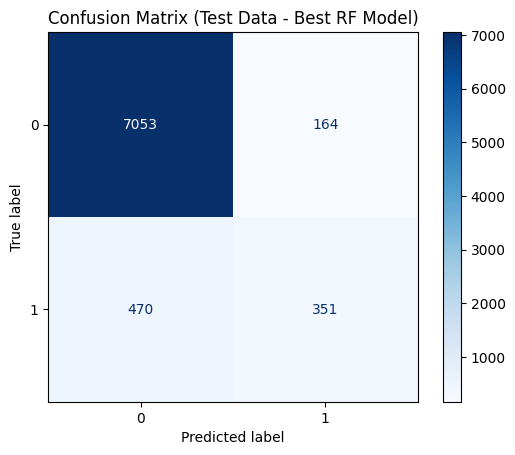

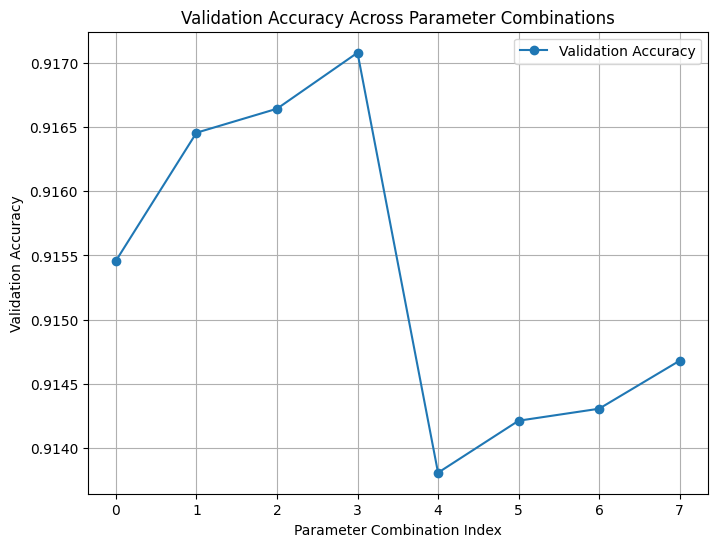

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, make_scorer

# hyperparameter Tuning with GridSearchCV
scoring_metrics = {
    'accuracy': 'accuracy',
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2']
}

# gridSearchCV with multiple metrics
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring=scoring_metrics,
    refit='accuracy',  # refits the model using the best accuracy
    cv=5  # 5-fold cross-validation
)

# fit GridSearchCV on training data
grid_search.fit(X_train, y_train.values.ravel())

# extract validation scores for the best model
best_index = grid_search.best_index_  
results = grid_search.cv_results_

print("Validation Scores for the Best Model:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Validation Accuracy: {results['mean_test_accuracy'][best_index]:.4f}")
print(f"Validation Recall: {results['mean_test_recall'][best_index]:.4f}")
print(f"Validation F1-Score: {results['mean_test_f1'][best_index]:.4f}")

# evaluate the Best Model on the Test Set
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_heldout)

print("\nTest Scores for the Best Model:")
print(f"Test Accuracy: {accuracy_score(y_heldout.values.ravel(), y_pred_best):.4f}")
print(f"Test Recall: {recall_score(y_heldout.values.ravel(), y_pred_best, average='macro'):.4f}")
print(f"Test F1-Score: {f1_score(y_heldout.values.ravel(), y_pred_best, average='macro'):.4f}")

# visualize Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_heldout.values.ravel(), y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Test Data - Best RF Model)")
plt.show()

# visualize Validation Performance Across Parameters
validation_accuracies = results['mean_test_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(range(len(validation_accuracies)), validation_accuracies, marker='o', label="Validation Accuracy")
plt.xlabel("Parameter Combination Index")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Across Parameter Combinations")
plt.legend()
plt.grid()
plt.show()

## Task 4. Isolation Forest

### 4.1 Apply Isolation Forest
### - Outlier Detection as an Unsupervised Classification

Use the [Isolation Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) to detect potential outliers in the data set. 

Select two parameters that you would like to investigate (for example, contamination, max_depth, n_estimators, max_samples). For each configuration: 

i) Apply Isolation Forest on the full data set (without using the labels Y)


ii) Use the labels to compute the accuracy, recall, precision, and F1-score on the full data set (using the labels). 


Compare the performance of Isolation Forest of different configurations. 


#### Tips:

- Note that the fit(X) function of the Isolation Forest does not use the labels. 


- **Look carefully at the values that an Isolation Forest classifier returns. Which value represents the outlier class? Be aware that you need to implement a mapping function f(x) that remaps -1 to 1 and 1 to 0, in order to transform the predictions such that the semantics are consistant with the previous classification algorithms.**


- Create 2D (or 3D) plots to visualize your results



Best Parameters: {'bootstrap': False, 'contamination': 0.15, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best F1-Score: 0.34736332849540397
                                         params  accuracy  ...    recall  f1_score
0   {'contamination': 0.05, 'n_estimators': 50}  0.880941  ...  0.166870  0.222583
1  {'contamination': 0.05, 'n_estimators': 100}  0.887659  ...  0.192448  0.259229
2  {'contamination': 0.05, 'n_estimators': 200}  0.889400  ...  0.199756  0.269515
3    {'contamination': 0.1, 'n_estimators': 50}  0.856183  ...  0.300853  0.299394
4   {'contamination': 0.1, 'n_estimators': 100}  0.861408  ...  0.338611  0.332934
5   {'contamination': 0.1, 'n_estimators': 200}  0.860786  ...  0.325213  0.323049
6   {'contamination': 0.15, 'n_estimators': 50}  0.826947  ...  0.417783  0.330284
7  {'contamination': 0.15, 'n_estimators': 100}  0.832172  ...  0.437272  0.347363
8  {'contamination': 

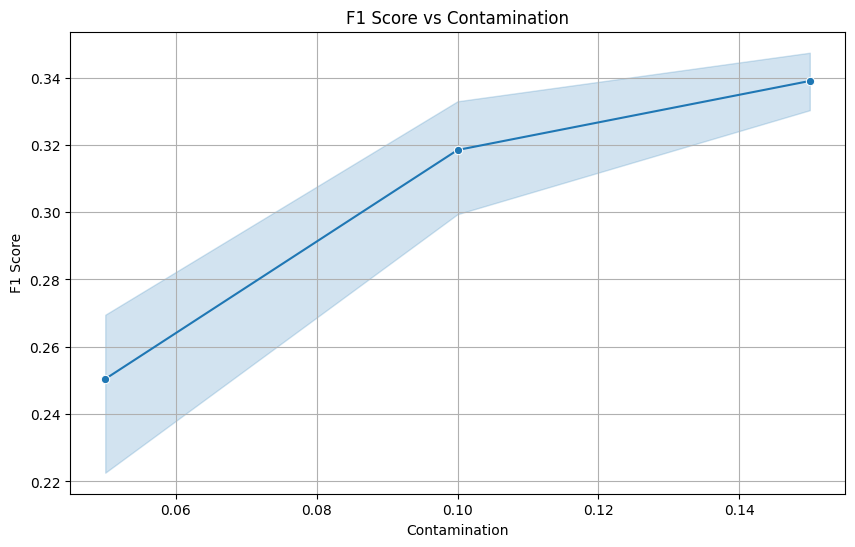

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import ParameterGrid

# TODO: Set the search space of the parameters
param_grid = {
    "contamination": [0.05, 0.1, 0.15],
    "n_estimators": [50, 100, 200]
}

# grid search over parameter combinations
grid = ParameterGrid(param_grid)
best_model = None
best_score = 0
results = []

for params in grid:
    # initializes Isolation Forest with current parameter combination
    clf = IsolationForest(
        contamination=params["contamination"],
        n_estimators=params["n_estimators"],
        random_state=42
    )
    
    # TODO: Apply the configured Isolation Forest model on the training set
    clf.fit(X_train)
    predictions = clf.predict(X_heldout)
    
    # remaps predictions: -1 (outlier) -> 1, 1 (inlier) -> 0
    predictions = np.where(predictions == -1, 1, 0)
    
    # TODO: Compute the performance of the model
    accuracy = accuracy_score(y_heldout, predictions)
    precision = precision_score(y_heldout, predictions)
    recall = recall_score(y_heldout, predictions)
    f1 = f1_score(y_heldout, predictions)
    
    # saves the results
    results.append({
        "params": params,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })
    
    # updates the best model if the current F1-score is higher
    if f1 > best_score:
        best_score = f1
        best_model = clf

# TODO: Return the optimal Isolation Forest model
print("Best Parameters:", best_model.get_params())
print("Best F1-Score:", best_score)

# organizes results in a DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)

contamination_values = results_df['params'].apply(lambda x: x['contamination'])
f1_scores = results_df['f1_score']

plt.figure(figsize=(10, 6))
sns.lineplot(x=contamination_values, y=f1_scores, marker='o')
plt.xlabel('Contamination')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Contamination')
plt.grid(True)
plt.show()

### 4.2 Outlier Detection - Analyze Outliers

Taking the best performing Isolation Forest model from Task 4.1, enrich the data set with the predicted labels (or scores) by the model. 

Perform one or two analyses to show the characteristics of the outliers. 

                    age                      ... nr.employed                    
                   mean    median       std  ...        mean    median       std
outlier_label                                ...                                
0              0.278376  0.259259  0.115499  ...    0.822692  0.877883  0.223038
1              0.316230  0.283951  0.179396  ...    0.489857  0.425709  0.333391

[2 rows x 186 columns]


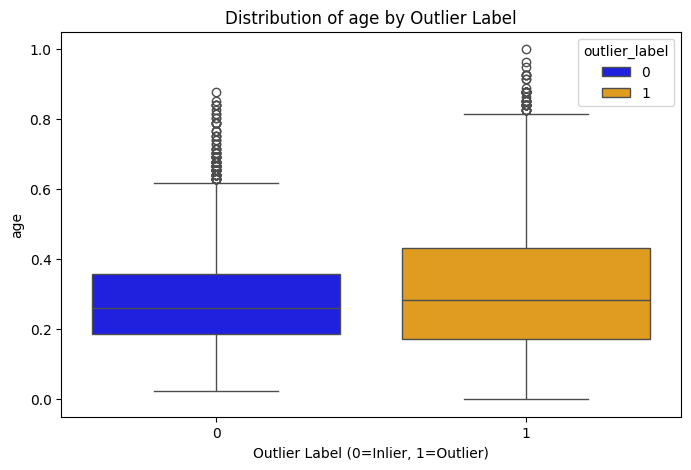

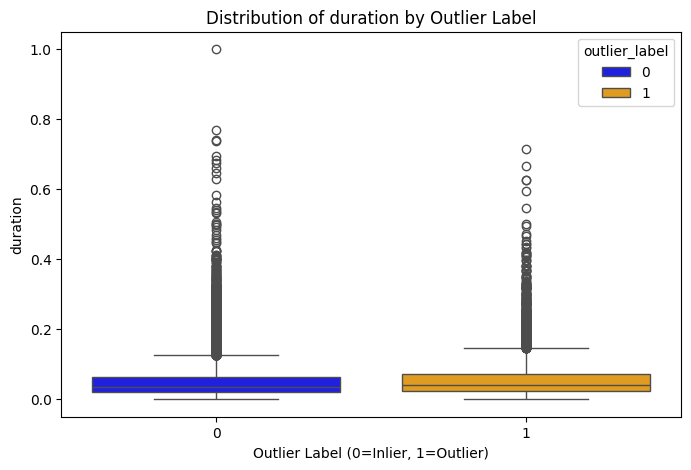

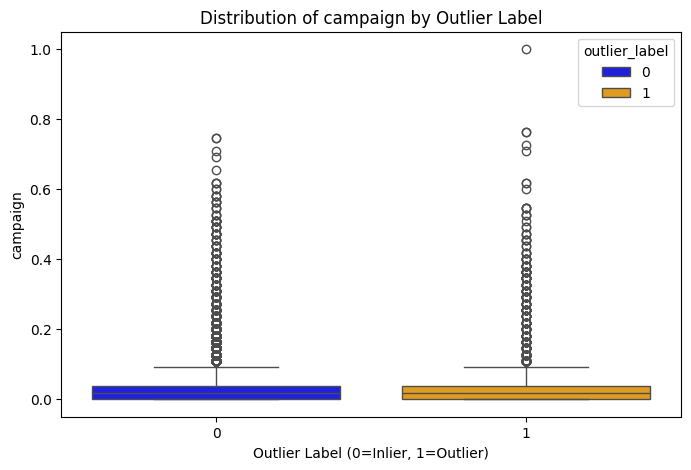

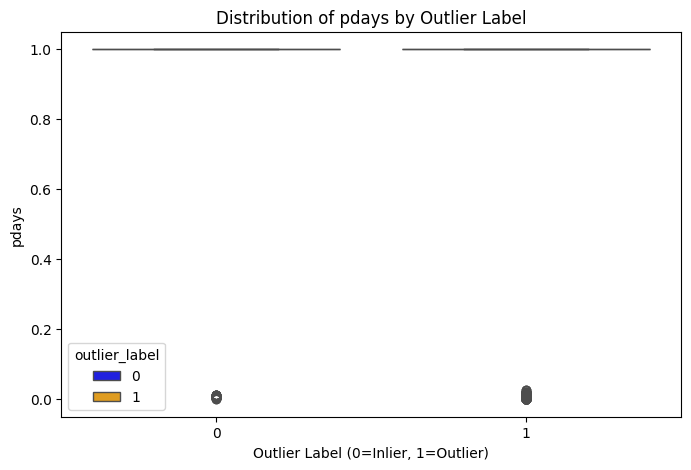

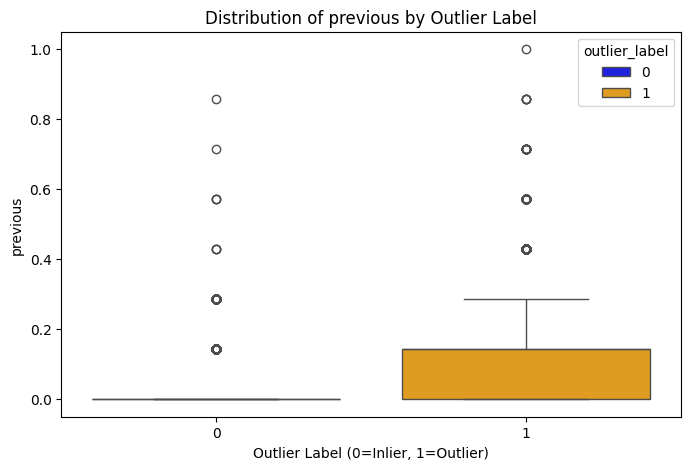

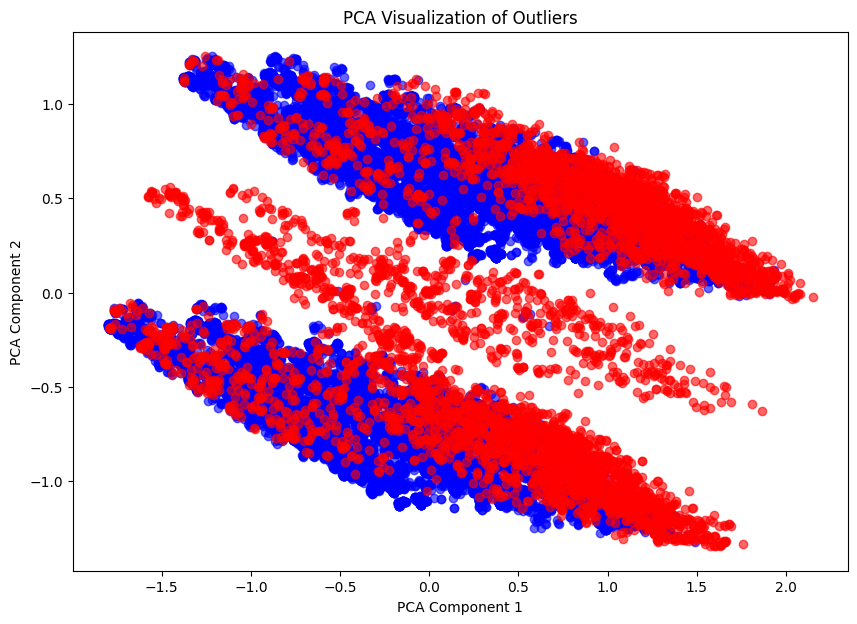

Correlation with Anomaly Score:
 anomaly_score           1.000000
poutcome=nonexistent    0.534386
nr.employed             0.484501
pdays                   0.478962
emp.var.rate            0.436932
                          ...   
housing=unknown        -0.332725
loan=unknown           -0.332725
poutcome=failure       -0.338597
poutcome=success       -0.453910
previous               -0.536813
Name: anomaly_score, Length: 63, dtype: float64


In [14]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Enrich the data with the anomaly scores assigned by the optimal model
# add predicted labels and anomaly scores to the dataset
data["outlier_label"] = best_model.predict(X)
data["anomaly_score"] = best_model.decision_function(X)

# remap labels for consistency: -1 (outlier) -> 1, 1 (inlier) -> 0
data["outlier_label"] = data["outlier_label"].apply(lambda x: 1 if x == -1 else 0)

# TODO: Perform one or two analyses to show the characteristics of the outliers
# casic statistics
basic_stats = data.groupby("outlier_label")[features].agg(["mean", "median", "std"])
print(basic_stats)

# visualization 1 - Feature distribution comparison
outlier_features = data[data["outlier_label"] == 1]
inlier_features = data[data["outlier_label"] == 0]

# boxplot for selected features
selected_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="outlier_label", y=feature, data=data, hue="outlier_label", palette={0: 'blue', 1: 'orange'})
    plt.title(f"Distribution of {feature} by Outlier Label")
    plt.xlabel("Outlier Label (0=Inlier, 1=Outlier)")
    plt.ylabel(feature)
    plt.show()

# visualization 2 - PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[data["outlier_label"] == 0, 0], X_pca[data["outlier_label"] == 0, 1], 
            c='blue', label="Inliers", alpha=0.6)
plt.scatter(X_pca[data["outlier_label"] == 1, 0], X_pca[data["outlier_label"] == 1, 1], 
            c='red', label="Outliers", alpha=0.6)
plt.title("PCA Visualization of Outliers")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# show the correlation with anomaly scores
correlation = data[features + ["anomaly_score"]].corr()["anomaly_score"].sort_values(ascending=False)
print("Correlation with Anomaly Score:\n", correlation)

## Task 5. Report your results and discuss your findings

### 5.1 Compare the performances 

By now, you have applied three algorithms with different parameters on the data set. For each algorithm, you have create tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that show the optimal performance of each algorithm on the data set, for example see the table here below. 

Discuss your findings in the report and reflect on the following questions:
- According to the performance results, which one is the optimal model? 
- How large is the difference between the accuracy score and the F1 score for each model? What caused the difference?
- Which of performance measures (the accuracy score, recall, precision, or F1-score) would you use for comparing the model performance? Why?
- You are comparing the performance of supervised algorithms (DT and RF) with an unsupervised algorithm (Isolation Forest). Is this a fair comparison? Motivate your answer. 



| Model | Validation Accuracy  | Test Accuracy |  Validation Recall  |  Test Recall  | Validation F1 | Test F1 |... |
|------|------|------|------|------|------|------|-----|
|   Decision Tree        |  |  | | | | |
|   Random Forest  |  |  | || | |
|   Isolation Forest        |  |  | || | |



In [15]:
compare_table = {
    "Model": ["Decision Tree", "Random Forest", "Isolation Forest"],
    "Validation Accuracy": [0.9176982892690513, 0.9171, 0.8284914463452566],
    "Test Accuracy": [0.9214978850460314, 0.9211, 0.832172],
    "Validation Recall": [0.523952997890931, 0.6926, 0.39590238023501056],
    "Test Recall": [0.5481120584652862, 0.7024, 0.437272],
    "Validation F1": [0.5679294578706728, 0.7296, 0.3227708179808401],
    "Test F1": [0.5878510777269759, 0.7412, 0.347363]
}

compare_dataframe = pd.DataFrame(compare_table)
print(compare_dataframe)

              Model  Validation Accuracy  ...  Validation F1   Test F1
0     Decision Tree             0.917698  ...       0.567929  0.587851
1     Random Forest             0.917100  ...       0.729600  0.741200
2  Isolation Forest             0.828491  ...       0.322771  0.347363

[3 rows x 7 columns]


In [16]:
#validation results for 5.1

clf = IsolationForest(contamination= 0.15, n_estimators= 100,
        random_state=42
    )
    
# TODO: Apply the configured Isolation Forest model on the training set
clf.fit(X_train)
predictions = clf.predict(X_heldout)
    
# remaps predictions: -1 (outlier) -> 1, 1 (inlier) -> 0
predictions = np.where(predictions == -1, 1, 0)
    
# TODO: Compute the performance of the model
accuracy = accuracy_score(y_heldout, predictions)
precision = precision_score(y_heldout, predictions)
recall = recall_score(y_heldout, predictions)
f1 = f1_score(y_heldout, predictions)

print(accuracy)
print(recall)
print(f1)

0.8321721821348594
0.43727161997563946
0.34736332849540397


In [17]:
#isolating the best performing model for 5.2

clf = IsolationForest(contamination= 0.15, n_estimators= 100,
        random_state=42
    )
    
# TODO: Apply the configured Isolation Forest model on the training set
clf.fit(X_train)
predictions = clf.predict(X_heldout)
    
# remaps predictions: -1 (outlier) -> 1, 1 (inlier) -> 0
predictions = np.where(predictions == -1, 1, 0)
    
# TODO: Compute the performance of the model
accuracy = accuracy_score(y_heldout, predictions)
precision = precision_score(y_heldout, predictions)
recall = recall_score(y_heldout, predictions)
f1 = f1_score(y_heldout, predictions)

print(accuracy)
print(recall)
print(f1)

isolation_forest_predictions = predictions

0.8321721821348594
0.43727161997563946
0.34736332849540397


The Random Forest algoritm seems to work best on this dataset. Both on the validation (0.729600) and the test set (0.741200) it scored significantly better than the decision tree and isolation forest.

difference accuracy and f1-score
Decision tree: 0.587851/0.921498 = 0.63792
Random Forest: 0.741200/0.921100 = 0.80469
Isolation Forest: 0.347363/0.832172 = 0.41741
The F1-score indicates a balance between precision and recall. A high accuracy but low F1 score indicates that the precision is low. When this happens there are items being classified but the algorithm is not sure. This can be a problem when detecting outliers as part of a class

The f1-score would be preferred because it gives a nice balance between precision and recall. Only relying on either precision or recall would not account for false negatives or false positives. Accuracy does not work very well with imbalanced classes as we have here.

It's is not a fair comparison. Supervised algorithms learn from labeled data to predict labels for unseen data. Where as unsupervised learners identify patterns without preexisting labels. With this labeled dataset it would be expected that the supervised algorithms would do better.

### 5.2 Analyze and discuss the results

For each optimal model, enrich your test set by adding the predicted labels by this model to the test set. Can you think of an analysis that gives insights into when the model performs poorly?

Discuss the analysis and insights in the report

In [18]:
random_forest_predictions = y_pred_best

decision_tree_predictions 
isolation_forest_predictions
random_forest_predictions

# create test_set copies
dt_test_set = X_heldout.copy()
rf_test_set = X_heldout.copy()
if_test_set = X_heldout.copy()

# add label
dt_test_set['Label'] = y_heldout
rf_test_set['Label'] = y_heldout
if_test_set['Label'] = y_heldout

# add predictions in test set
dt_test_set['Predicted'] = decision_tree_predictions
rf_test_set['Predicted'] = random_forest_predictions
if_test_set['Predicted'] = isolation_forest_predictions

# identify misclassifications
dt_test_set['Misclassified'] = dt_test_set['Label'] != dt_test_set['Predicted']
rf_test_set['Misclassified'] = rf_test_set['Label'] != rf_test_set['Predicted']
if_test_set['Misclassified'] = if_test_set['Label'] != if_test_set['Predicted']

# filter miscalssifications
dt_misclassified = dt_test_set[dt_test_set['Misclassified']]
rf_misclassified = rf_test_set[rf_test_set['Misclassified']]
if_misclassified = if_test_set[if_test_set['Misclassified']]

print(dt_misclassified)

            age  job=housemaid  job=services  ...  Label  Predicted  Misclassified
22585  0.135802              0             0  ...      0          1           True
12044  0.123457              0             0  ...      0          1           True
12013  0.469136              0             0  ...      1          0           True
1786   0.197531              0             0  ...      1          0           True
33165  0.543210              0             0  ...      0          1           True
...         ...            ...           ...  ...    ...        ...            ...
30421  0.580247              0             0  ...      1          0           True
31581  0.493827              0             0  ...      0          1           True
2931   0.345679              1             0  ...      1          0           True
26186  0.296296              0             0  ...      0          1           True
20232  0.111111              0             0  ...      0          1           True

[63

## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 0.5 extra point. 

### Bonus Task 1

Implement another outlier detection algorithm (for example, LOF, OC-SVM) or design your own outlier detection algorithm that achieves a better F1 score. 




In [19]:
from sklearn.cluster import DBSCAN

# iterate through these paremeters for dbscan (these lists initially held way more values to find the perfect parameters, the list was shortened to simply showcase that it does iterate without taking too long to load)
eps_values = [1, 1.5, 2]
min_samples_values = [10, 15, 20, 21]

best_f1 = 0
best_params = None

# Iterate over parameter grid
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred = db.fit_predict(X_train)

        # map dbscan with -1 for noise/oultiers and 0 for inliers
        y_pred = [1 if label == -1 else 0 for label in y_pred]

        # evaluate the predictions
        f1 = f1_score(y_train, y_pred)

        print(f"DBSCAN (eps={eps}, min_samples={min_samples}) | F1: {f1:.4f}")

        # keep track of the best parameter and f1 score
        if f1 > best_f1:
            best_f1 = f1
            best_params = (eps, min_samples)

print(f"Best F1 score: {best_f1} with parameters eps={best_params[0]}, min_samples={best_params[1]}")

DBSCAN (eps=1, min_samples=10) | F1: 0.2066
DBSCAN (eps=1, min_samples=15) | F1: 0.1973
DBSCAN (eps=1, min_samples=20) | F1: 0.1930
DBSCAN (eps=1, min_samples=21) | F1: 0.1919
DBSCAN (eps=1.5, min_samples=10) | F1: 0.3245
DBSCAN (eps=1.5, min_samples=15) | F1: 0.3427
DBSCAN (eps=1.5, min_samples=20) | F1: 0.3395
DBSCAN (eps=1.5, min_samples=21) | F1: 0.3381
DBSCAN (eps=2, min_samples=10) | F1: 0.1845
DBSCAN (eps=2, min_samples=15) | F1: 0.2094
DBSCAN (eps=2, min_samples=20) | F1: 0.2290
DBSCAN (eps=2, min_samples=21) | F1: 0.2307
Best F1 score: 0.34271819810596366 with parameters eps=1.5, min_samples=15


### Bonus Task 2 

Implement techniques (e.g., preprocessing, feature engineering, sampling) that help improve the F1 scores of existing models


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC

# create 5-fold cross-validation
nk = 5
kf = KFold(n_splits=nk, random_state=42, shuffle=True)

# parameters for dbscan
eps = 1.5
min_samples = 21

# identify categorical columns that have binary data
categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                        25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
                        47, 48, 49, 54, 55, 56] 

# init f1
f1_scores = np.zeros(nk)

i = 0
for train_index, val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # preprocess standardscaler
    scaler = StandardScaler()
    X_t_scaled = scaler.fit_transform(X_t)
    X_val_scaled = scaler.transform(X_val)

    # apply smotenc for oversampling outliers
    smote = SMOTENC(categorical_features=categorical_features, sampling_strategy='auto')
    X_t_resampled, y_t_resampled = smote.fit_resample(X_t_scaled, y_t)
    
    # init dbscan
    db = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = db.fit_predict(X_t_resampled)

    # map dbscan with -1 for noise/oultiers
    y_pred_binary = [1 if label == -1 else 0 for label in y_pred]

    # calculate F1 score for the current fold
    f1_scores[i] = f1_score(y_t_resampled, y_pred_binary)
    i += 1

# calculate the mean F1 score across all folds
mean_f1 = np.mean(f1_scores)
print(f"Mean F1 Score across {nk}-fold cross-validation with DBSCAN: {mean_f1:.4f}")

Mean F1 Score across 5-fold cross-validation with DBSCAN: 0.5516


### Prediction Challenge 

- Import the independent test set without labels, apply your best performing model on this test set. 

- Enrich the test set with the predicted labels (**name this column 'predictedClass'**) 

- Export both the model as pkl file and the enriched test data set as a csv file. 

- The top three teams that have achieved the best accuracy score wins max. 0.3 bonus points.




In [26]:
import pickle

# import data
data_challenge = pd.read_csv('./dataBank-new_test_nolabel.csv', sep=',')
X_new = data_challenge[features]
print(X_new.describe())

# uses the trained decision tree classifier with the best parameters
optimal_model = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=6)
optimal_model.fit(X_train, y_train)

# generates predictions for the new data
yhat = optimal_model.predict(X_new)

# enriches the data with the predicted labels "predictedClass"
data_challenge['predictedClass'] = yhat

# exports the enriched data
data_challenge.to_csv('enriched_test_data.csv', index=False)

# exports the model to a .pkl file
with open('best_decision_tree_model.pkl', 'wb') as f:
    pickle.dump(optimal_model, f)

print("Prediction and export complete.")

               age  job=housemaid  ...    euribor3m  nr.employed
count  1000.000000    1000.000000  ...  1000.000000  1000.000000
mean      0.290494       0.030000  ...     0.514259     0.636696
std       0.154721       0.170673  ...     0.432627     0.336082
min       0.000000       0.000000  ...     0.000453     0.000000
25%       0.172840       0.000000  ...     0.089549     0.425709
50%       0.246914       0.000000  ...     0.200861     0.512287
75%       0.382716       0.000000  ...     0.980503     1.000000
max       1.000000       1.000000  ...     0.989798     1.000000

[8 rows x 62 columns]
Prediction and export complete.


In [27]:
import sklearn
print(sklearn.__version__)

1.5.2
